In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import numba
from make_features import single_autocorr, prepare_data, find_start_end
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statsmodels.api as sm
import seaborn as sns
decompfreq = 288

/home/lihaocheng_i/.conda/envs/py3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/home/lihaocheng_i/.conda/envs/py3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
dataframe, start, end = prepare_data(0, 26496, 0.01)
# for i in range(df.shape[0]):
#     df[i, np.arange(start[i])] = -1
df = dataframe.values

/home/lihaocheng_i/.conda/envs/py3/lib/python3.6/site-packages/tables/leaf.py:414: PerformanceWarning: The Leaf ``/df/block0_values`` is exceeding the maximum recommended rowsize (104857600 bytes);
be ready to see PyTables asking for *lots* of memory and possibly slow
I/O.  You may want to reduce the rowsize by trimming the value of
dimensions that are orthogonal (and preferably close) to the *main*
dimension of this leave.  Alternatively, in case you have specified a
very small/large chunksize, you may want to increase/decrease it.
  PerformanceWarning)
/home/lihaocheng_i/.conda/envs/py3/lib/python3.6/site-packages/pandas/io/pytables.py:734: FutureWarning: 
Panel is deprecated and will be removed in a future version.
The recommended way to represent these types of 3-dimensional data are with a MultiIndex on a DataFrame, via the Panel.to_frame() method
Alternatively, you can use the xarray package http://xarray.pydata.org/en/stable/.
Pandas provides a `.to_xarray()` method to help auto

Masked 73 pages from 4897


In [3]:
dataframe

,0,1,2,3,4,5,6,7,8,9,...,26486,26487,26488,26489,26490,26491,26492,26493,26494,26495
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.285262,9.268892,9.224539,9.133459,9.279027,9.274348,9.303922,9.292842,9.276596,9.262458
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.210940,9.210840,9.210940,9.210840,9.211140,9.210840,9.211939,9.210640,9.211240,9.210940
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.329456,9.314070,9.330166,9.345308,9.349145,9.356689,9.321703,9.343647,9.165970,9.239316
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.295837,3.871201,3.258097,3.258097,3.218876,3.295837,3.332205,3.258097,3.295837,3.295837
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.210040,9.210240,9.210140,9.210140,9.210040,9.210040,9.210140,9.210140,9.209940,9.210140
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.210240,9.210240,9.210140,9.210240,9.210040,9.210340,9.210240,9.210340,9.210440,9.210340
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.209540,9.209640,9.208939,9.209340,9.209540,9.208439,9.209540,9.209640,9.209140,9.209540
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.167809,7.206377,7.222566,7.257708,7.181592,7.267525,7.198931,7.130899,8.014997,7.177782
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.247540,9.329900,9.285912,9.156412,9.296610,9.294590,9.309733,9.299632,9.303740,9.230045
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.293670,9.247540,9.057655,9.285633,9.289244,9.151333,9.205428,9.276503,9.275285,9.304195


In [3]:
def depict_auto(st, max_lag):
    fig, axs = plt.subplots(8, 1, figsize=(10, 80))
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    for i in range(st, st + 56):
        valid = df[i, start[i]:]
        cor = [single_autocorr(valid, i) for i in range(1, max_lag)]
        ax = axs[(i - st) // 7]
        ax.plot(np.arange(max_lag - 1), cor, colors[(i - st) % 7], label=str(i))
        ax.legend(loc='upper right')
        if not (i - st) % 7:
            ax.set_title(f'autocor for vm from {i} to {i + 6}')
            ax.set_xlabel('lag')
            ax.set_ylabel('autocorrelation')
            for i in range(max_lag // 288 + 1):
                ax.axvline(x=288 * i, color='k', linestyle='--')
    plt.show()
    
def depict_cpu(vm, st = 0, end = df.shape[1]):
    if st == 0: st = start[vm]
    else: st += start[vm]
    if not end == df.shape[1]: end += start[vm]
    plt.plot(np.arange(end - st), df[vm, st:end])
    plt.title(f'cpu usage for {vm}')
    plt.xlabel('timestamps')
    plt.ylabel('cpu usage')
    plt.show()
    
def find_periodic(vms):
    for vm in vms:
        res = sm.tsa.seasonal_decompose(dataframe.iloc[vm, start[vm]+1000:].interpolate(),
                                        freq=decompfreq,
                                        model='additive')
        # resplot = res.plot()
        # resplot.show()
        print( (res.seasonal.max() - res.seasonal.min())/ (res.observed.max() - res.observed.min()))

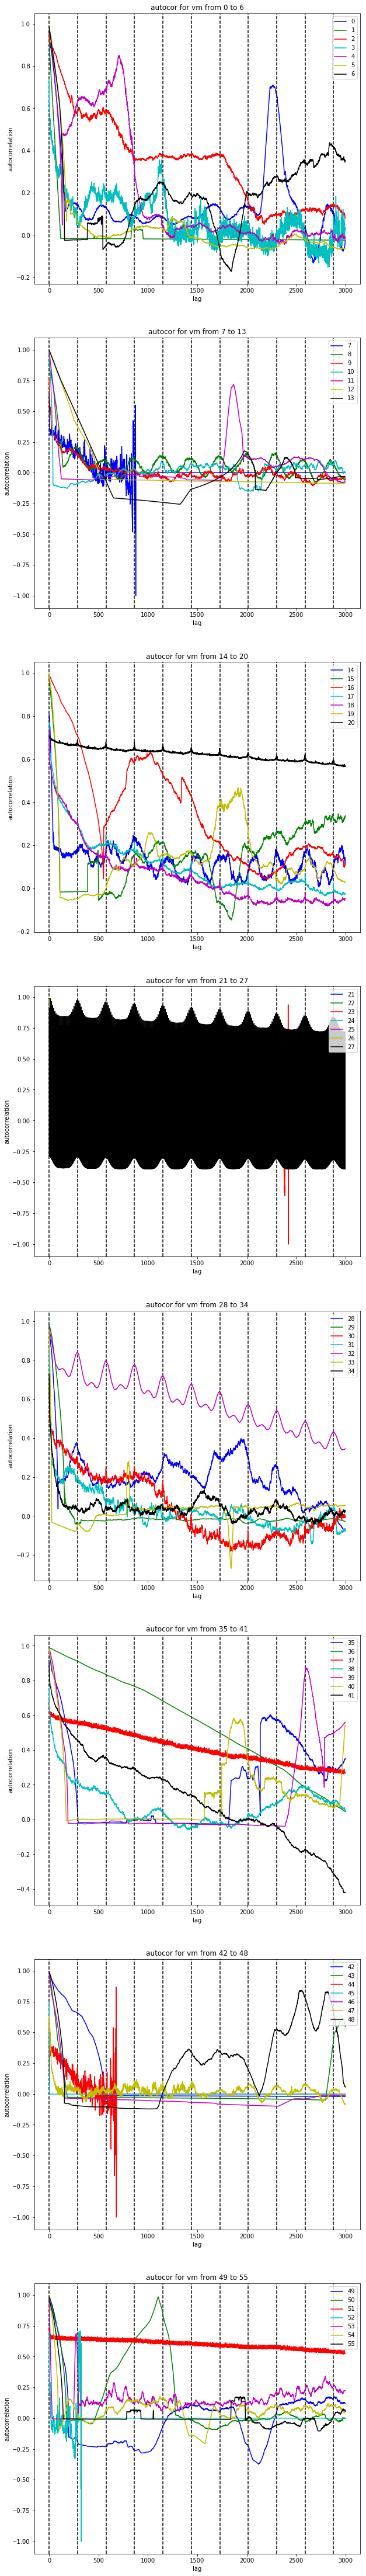

In [4]:
depict_auto(0, 3000)

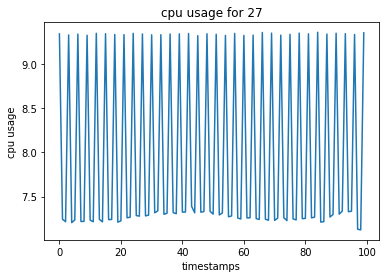

In [16]:
depict_cpu(27, 6000, 6100)

In [8]:
find_periodic([8])

0.16123797962288663


In [21]:
import os
path = os.path.join("data", "df32.pkl")
dataframe.iloc[32, :].to_pickle(path)

In [19]:
dataframe.iloc[27, :]

0        0.000000
1        0.000000
2        0.000000
3        0.000000
4        0.000000
5        0.000000
6        0.000000
7        0.000000
8        0.000000
9        0.000000
10       0.000000
11       0.000000
12       0.000000
13       0.000000
14       0.000000
15       0.000000
16       0.000000
17       0.000000
18       0.000000
19       0.000000
20       0.000000
21       0.000000
22       0.000000
23       0.000000
24       0.000000
25       0.000000
26       0.000000
27       0.000000
28       0.000000
29       0.000000
           ...   
26466    9.337678
26467    7.181592
26468    7.223296
26469    7.313887
26470    7.327123
26471    7.310550
26472    7.306531
26473    7.286876
26474    7.268920
26475    7.264030
26476    7.267525
26477    7.245655
26478    9.335915
26479    7.279319
26480    7.246368
26481    7.265430
26482    7.205635
26483    7.141245
26484    7.118016
26485    7.053586
26486    7.013915
26487    7.003065
26488    6.973543
26489    6.969791
26490    9